<a href="https://colab.research.google.com/github/MrYousaf128/Machine-Learning/blob/main/House_price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [10]:
dataset = pd.read_csv("housing.csv")
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [13]:
dataset.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [12]:
dataset.dropna(inplace=True)

In [7]:
from sklearn.model_selection import train_test_split

In [14]:
x=dataset.drop(['median_house_value'],axis=1)
y=dataset['median_house_value']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
train_data=X_train.join(y_train)

In [17]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,<1H OCEAN,227600.0
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,INLAND,110400.0
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,INLAND,248100.0
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,<1H OCEAN,305600.0
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,NEAR OCEAN,214600.0
...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,2991.0,500.0,1437.0,453.0,5.4286,<1H OCEAN,273400.0
12081,-117.54,33.76,5.0,5846.0,1035.0,3258.0,1001.0,4.7965,<1H OCEAN,160800.0
5447,-118.42,34.01,42.0,1594.0,369.0,952.0,362.0,3.0990,<1H OCEAN,335400.0
866,-122.04,37.57,12.0,5719.0,1064.0,3436.0,1057.0,5.2879,NEAR BAY,231200.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

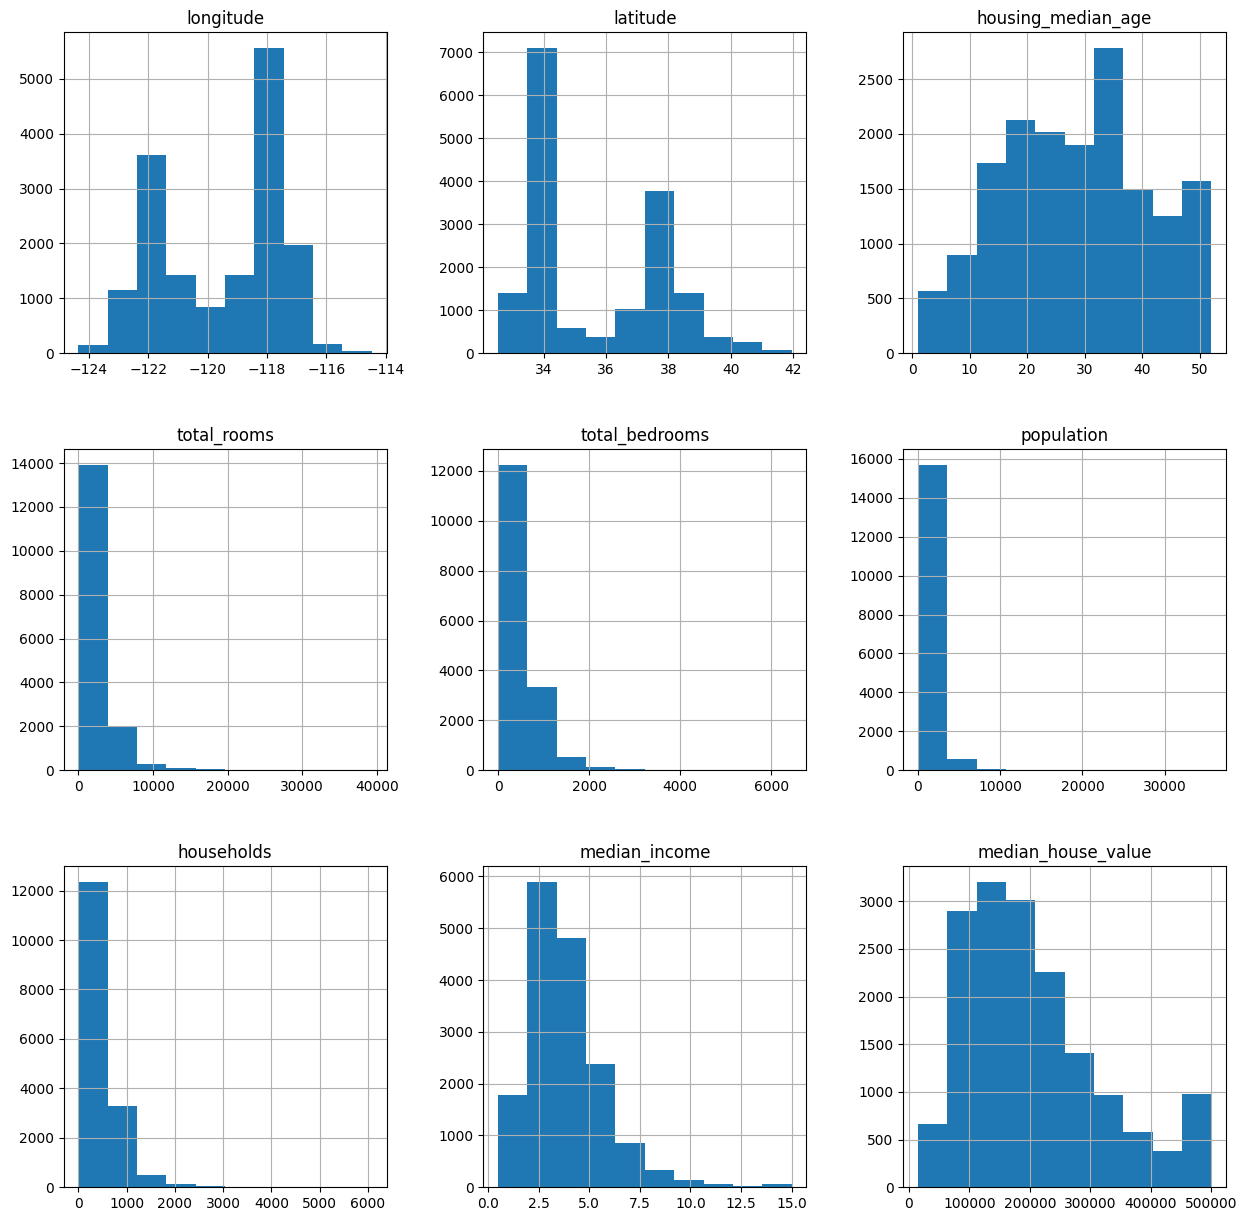

In [18]:
train_data.hist(figsize=(15,15))

In [59]:
train_data.replace('<1H OCEAN',0, inplace=True)
train_data.replace('INLAND',1, inplace=True)
train_data.replace('NEAR OCEAN',2, inplace=True)
train_data.replace('NEAR BAY',3, inplace=True)
train_data.replace('ISLAND',4, inplace=True)

<Figure size 1500x1500 with 0 Axes>

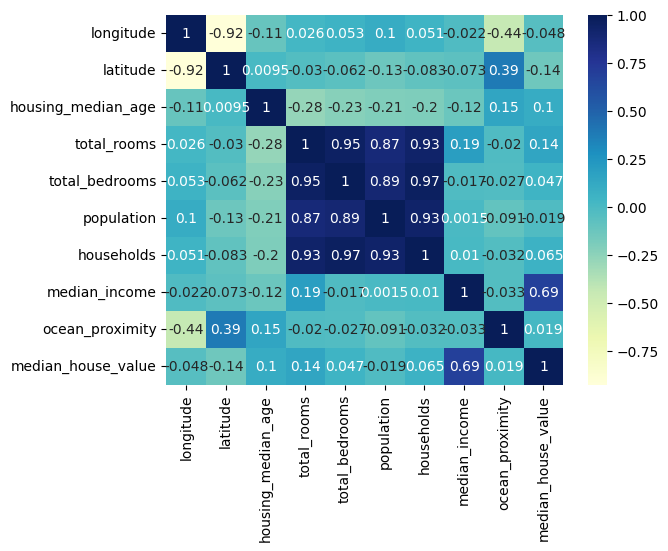

<Figure size 1500x1500 with 0 Axes>

In [55]:
sns.heatmap(train_data.corr(),annot=True,cmap='YlGnBu')
plt.figure(figsize=(15,15))

In [56]:
train_data['total_rooms']=np.log(train_data['total_rooms'])
train_data['total_bedrooms']=np.log(train_data['total_bedrooms'])
train_data['population']=np.log(train_data['population'])
train_data['households']=np.log(train_data['households'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [57]:
train_data.ocean_proximity.value_counts()

,count
ocean_proximity,
0,7231
1,5156
2,2114
3,1842
4,3


<Axes: xlabel='longitude', ylabel='latitude'>

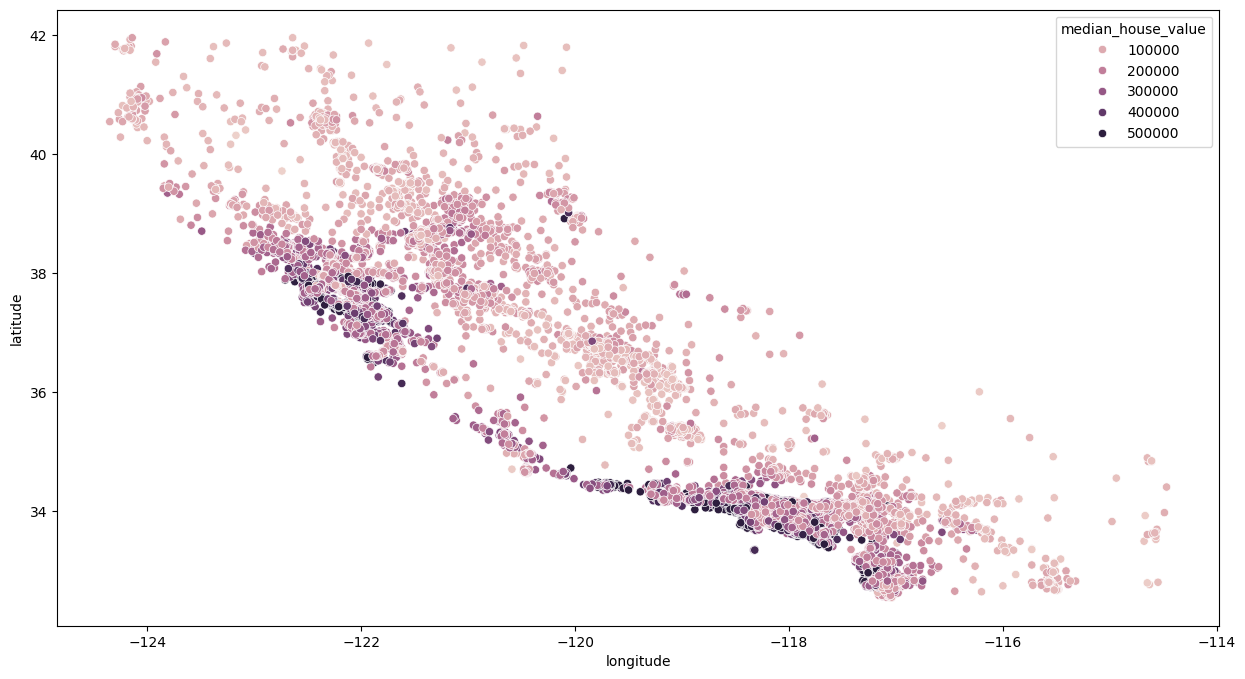

In [63]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='longitude',y='latitude',hue='median_house_value',data=train_data)

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
reg=LinearRegression()

In [69]:
X_train,y_train=train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']


In [76]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

In [77]:
X_train_imputed = imputer.fit_transform(X_train)

In [78]:
reg.fit(X_train_imputed, y_train)

LinearRegression()

In [79]:
test_data=X_train.join(y_train)


test_data['total_rooms']=np.log(test_data['total_rooms'])
test_data['total_bedrooms']=np.log(test_data['total_bedrooms'])
test_data['population']=np.log(test_data['population'])
test_data['households']=np.log(test_data['households'])



/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [80]:
X_test,y_test=test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']

In [82]:
# Handle potential NaNs after log transformation
test_data.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace infinite values with NaN
test_data.dropna(inplace=True)  # Drop rows with NaN values

X_test,y_test=test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']

reg.score(X_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


0.6111523081028257